In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML
#PRINTING THE DISLOCATION POSITIONS
def print_dis():
    print(x_dis, y_dis)
    

#CAUTION, SOME FORMULAE GIVEN IN THE THESIS NEED TO BE RECHECKED - STRESS FIELD AND THE VELOCITY PROFILE
#GRID GENERATION

#Grid size in terms of Burger's vector, Burger's vector = 1unit in the x-direction
#The grid is a sqaure
grid_size = 50

#Finding out the grid coordinates
x_coord = np.linspace(0, grid_size - 1, grid_size)
y_coord = x_coord
#print(y_coord)

#GENERATING THE DISLOCATIONS

#Number of disclocations = num_dis
num_dis = 20

#Dislocations identity = (x, y ,s); where s can be +1 or -1 DEFINED GLOBALLY. THE COORDINATES OF THE DISLOCATIONS ARE UPDATED 
#GLOBALLY
s = [1, -1]
x_dis = np.random.choice(x_coord, num_dis)
y_dis = np.random.choice(y_coord, num_dis)
s_dis = np.random.choice(s, num_dis)

c_x_dis = np.copy(x_dis)
c_y_dis = np.copy(y_dis)
c_s_dis = np.copy(s_dis)
#print_dis()

# x_dis[0] = 10
# x_dis[1] = 20
# y_dis[0] = 5
# y_dis[1] = 5
# s_dis[0] = 1
# s_dis[1] = -1
# y_dis[2] = 60
# x_dis[2] = 60
#PLOTTING FUNCTION
def plot_dis():
    #Plotting the dislocations
    plt.axis([0, grid_size - 1, 0, grid_size - 1])
    plt.xlabel('x(b)')
    plt.ylabel('y(b)')
    plt.title('Dislocations In The Box')
    plt.grid(True)

    for i in range(len(s_dis)):
        if s_dis[i] == 1:
            plt.plot(x_dis[i], y_dis[i], 'r^')
        
        else:
            plt.plot(x_dis[i], y_dis[i], 'bv')
    plt.show()



#ANNIHILATION FUNCTION
#The dislocations will be annihilated if the distance between them is strictly less than the length of the burger's vector

def annihilate(b):
    e = []
    global x_dis
    global y_dis
    global s_dis
    a = len(x_dis)
    for i in range(a):
        for j in range(i+1, a):
            dis = ((x_dis[i] - x_dis[j]) ** 2 + (y_dis[i] - y_dis[j]) ** 2) ** 0.5
            if dis < b:
                e.append(j)
                e.append(i)
                
    e = set(e)
    e = sorted(e, reverse = True)
    
    for i in e:
        x_dis = np.delete(x_dis, i)
        y_dis = np.delete(y_dis, i)
        s_dis = np.delete(s_dis, i)
        
    return               

In [2]:
#STRESS FIELD AT A PARTICULAR POINT


#The function evaluates the stress field at a point in the box. It takes the position of the dislocation(xd, yd) whose stress at a 
#point(x, y) has to be calculated. Burger's vector is kept as 1. Stress is measured in terms of meu/(2*pi*(1-v)). 
#Time is measured in terms of 2*pi*(1-neu)/(meu * mobi * burgers)
def stress_field(x_d, y_d, x, y):
    stress = np.pi/grid_size * np.sin(2 * np.pi * (x - x_d)/grid_size) * (np.cosh(2 * np.pi * (y - y_d)/grid_size) - np.cos(2 * np.pi * (x - x_d)/grid_size) - (2 * np.pi * (y - y_d)/grid_size) * np.sinh(2 * np.pi * (y - y_d)/grid_size))/((np.cosh(2 * np.pi * (y - y_d)/grid_size) - np.cos(2 * np.pi * (x - x_d)/grid_size)) ** 2)
    
    return stress
    
#CALCULATING THE 

In [3]:
#CALCULATING THE VELOCITY OF EACH DISLOCATION

#No climbing, just gliding =====> y is constant

#The following function calculates the (total sum stress + sigma_ext) * s * b^2 at dislocation(x, y), z = s_dis(x,y)
def sum_stress(x, y, s, x_dummy, stress_external):
    sum_inter = 0 
    for i in range(len(x_dummy)):
        if x == x_dummy[i] and y == y_dis[i]:
            continue
        else:
            sum_inter = sum_inter + stress_field(x_dummy[i], y_dis[i], x, y) * s_dis[i]
    sum_inter = sum_inter + stress_external
    #Burgers vector value is 1
    return(s * sum_inter)

#NEW LOCATION OF THE DISLOCATION

#Units of timestep are 2 * pi * (1 - neu)/(meu * mobi * Burger). Timestep thus I am taking is 1000

def new_location(step, stress_ext):
    x_int = np.copy(x_dis)
    x_dummy = np.copy(x_dis)
    itr = len(x_dummy)
    
    k1 = np.zeros(itr)
    k2 = np.zeros(itr)
    k3 = np.zeros(itr)
    k4 = np.zeros(itr)
    
    for i in range(itr):
        k1[i] = sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
                   
    for i in range(itr):
        x_dummy[i] = x_dis[i] + step/2.0 * k1[i]
        #print(x_dis[i],x_dis[i] + step/2.0 * a[i],x_dummy[i],'{:.16f}'.format(x_dummy[i] - x_dis[i]))
    
    
    for i in range(itr):
        k2[i] = sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
        
    for i in range(itr):
        x_dummy[i] = x_dis[i] + step/2 * k2[i]
    
    
    for i in range(itr):
        k3[i] = sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
        
    for i in range(itr):
        x_dummy[i] = x_dis[i] + step * k3[i]
        
    
    for i in range(itr):
        k4[i] = sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
    
    for i in range(itr):
        x_dis[i] = (x_dis[i] + step/6 * (k1[i] + 2 * k2[i] + 2 * k3[i] + k4[i]))%grid_size
       
    return x_int
     


In [4]:
def asrk5(eps, yscal, xn, stress_ext):
    global h  
    #print(h, "1")
    #a constants
    a2 = 0.2
    a3 = 0.3
    a4 = 0.6
    a5 = 1
    a6 = 0.875
    
    #print(h)
    #b constants
    b21 = 0.2 
    b31 = 0.075
    b32 = 0.225
    b41 = 0.3
    b42 = -0.9
    b43 = 1.2
    b51 = -11/54
    b52 = 2.5
    b53 = -70/27
    b54 = 35/27
    b61 = 1631/55296
    b62 = 175/512
    b63 = 575/13824
    b64 = 44275/110592
    b65 = 253/4096
    
    #c constants
    c1 = 37/378
    c2 = 0
    c3 = 250/621
    c4 = 125/594
    c5 = 0
    c6 = 512/1771
    
    #d constants
    d1 = 2825/27648
    d2 = 0
    d3 = 18575/48384
    d4 = 13525/55296
    d5 = 277/14336
    d6 = 0.25
    
    #proceeding with the starting h
    #The function needs to be kept as a parameter for making this algorithm general
    itr = len(xn)
    x_int = np.copy(xn)
    x_dummy = np.copy(xn)
    
    k1 = np.zeros(itr)
    k2 = np.zeros(itr)
    k3 = np.zeros(itr)
    k4 = np.zeros(itr)
    k5 = np.zeros(itr)
    k6 = np.zeros(itr)
    error = np.zeros(itr)
    
    for i in range(itr):
        k1[i] = h * sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
        
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b21 * k1[i]
        
    
    for i in range(itr):
        k2[i] = h * sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
        
    x_dummy = np.copy(xn)
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b31 * k1[i] + b32 * k2[i]
    
    
    for i in range(itr):
        k3[i] = h * sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
    
    x_dummy = np.copy(xn)
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b41 * k1[i] + b42 * k2[i] + b43 * k3[i]
        

    for i in range(itr):
        k4[i] = h * sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
    
    x_dummy = np.copy(xn)
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b51 * k1[i] + b52 * k2[i] + b53 * k3[i] + b54 * k4[i]
    
    
    for i in range(itr):
        k5[i] = h * sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
    
    x_dummy = np.copy(xn)
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + b61 * k1[i] + b62 * k2[i] + b63 * k3[i] + b64 * k4[i] +b65 * k5[i]
        
    for i in range(itr):
        k6[i] = h * sum_stress(x_dummy[i], y_dis[i], s_dis[i], x_dummy, stress_ext)
    
    x_dummy = np.copy(xn)
    for i in range(itr):
        x_dummy[i] = x_dummy[i] + c1 * k1[i] + c2 * k2[i] + c3 * k3[i] + c4 * k4[i] + c5 * k5[i] + c6 * k6[i]
        #Calculating the error
        error[i] = (c1 - d1) * k1[i] + (c2 - d2) * k2[i] + (c3 - d3) * k3[i] + (c4 - d4) * k4[i] + (c5 - d5) * k5[i] + (c6 - d6) * k6[i]

    #Step size control, the total sum of the errors is taken. This can be modified according to the needs
    del_new = 0
    del_cons = 0
    for i in range(itr):
        del_cons = del_cons + eps * yscal[i]
        del_new = del_new + error[i]
          
    
    
    # if the error is zero we will proceed with the same h
    safety = 0.99
    epsilon = 10 ** (-13)
    
    if abs(del_new) >= epsilon: 
        if abs(del_new) > abs(del_cons):
            h = safety * h * (abs(del_cons/del_new)) ** 0.25
            #print(h, "2")
            asrk5(eps, yscal, xn)
                    
        else:
            #print(del_cons/del_new, "factor")
            c= h
            h = safety * h * (abs(del_cons/del_new)) ** 0.2
            
            for i in range(itr):
                xn[i] = x_dummy[i]
            #print(h, "3")
            return c 
        
    else: 
        for i in range(itr):
                xn[i] = x_dummy[i]
        
        return x_int 



In [5]:
#Euler Method
def euler(step, xn, stress_ext):
    itr = len(xn)
    x_int = np.copy(xn)
    
    for i in range(itr):
        xn[i] = xn[i] + step * sum_stress(x_dis[i], y_dis[i], s_dis[i], x_dis, stress_ext) 
    
    return x_int

In [6]:

#LOCATION AFTER "t" TIMESTEPS
def location_after_iterations(itr, step, stress):
    kill = 0
    strain = np.zeros(itr)
    #eps = 10 ** (-9)
    #yscal = [1 for x in range(len(s_dis))]
    for j in range(itr):
        annihilate(2)
        
        #dummy = new_location(step, stress)
        
        #dummy = asrk5(eps, yscal, x_dis, stress)
        #yscal = [1 for x in range(len(s_dis))]
        
        dummy = euler(step, x_dis, stress)
        
       
        g = len(s_dis)
        if g == 0:
            kill = 1
            break
            
        for k in range(g):
            strain[j] = (strain[j] + s_dis[k] * (x_dis[k] - dummy[k])/step)
        strain[j] = strain[j]/(grid_size ** 2)
    
    if kill != 1:
        for i in range(itr):
            if i != 0:
                strain[i] = strain[i] + strain[i - 1] 
            
    if kill != 1:
        return strain
    else:
        return print("No Dislocations Left")


20


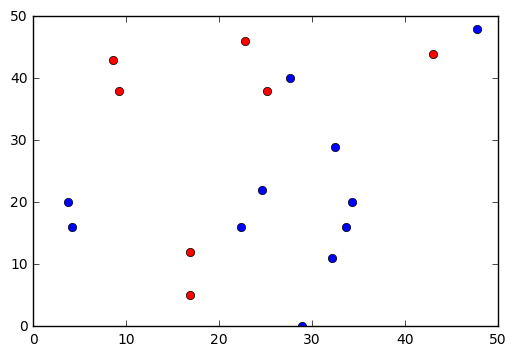

In [10]:
# h = 0.001#for asrk5
# itr = 100000
# stress = 0
# strain = location_after_iterations(itr, h, stress)
# time = np.zeros(itr)
# time[0] = h
# for i in range(itr-1):
#     time[i+1] = time[i] + h
# plt.plot(strain)
# plt.show()
x_dis = np.copy(c_x_dis)
y_dis = np.copy(c_y_dis)
s_dis = np.copy(c_s_dis)
strain_new = 0
strain_new = []

fig,ax = plt.subplots()
ax.set_xlim(( 0, grid_size))
ax.set_ylim((0, grid_size))

line1, = ax.plot([], [], 'ro')
line2, = ax.plot([], [], 'bo')

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# animation function.  This is called sequentially
def animate(i):
    global strain_new
    strain_inter = location_after_iterations(1, 0.01, 0)
    strain_new.append(strain_inter)
    x_pos = [[], []]
    y_pos = [[], []]
    for i in range(len(x_dis)):
        if(s_dis[i] == 1):
            x_pos[0].append(x_dis[i])        
            y_pos[0].append(y_dis[i])
        else:
            x_pos[1].append(x_dis[i])        
            y_pos[1].append(y_dis[i])
        
        line1.set_data(x_pos[0], y_pos[0])
        line2.set_data(x_pos[1], y_pos[1])
    return line1, line2

# call the animator.  blit=True means only re-draw the parts that have changed.
print(len(s_dis))
anim = animation.FuncAnimation(fig, animate,init_func = init, frames=20000, blit=True)
HTML(anim.to_html5_video())


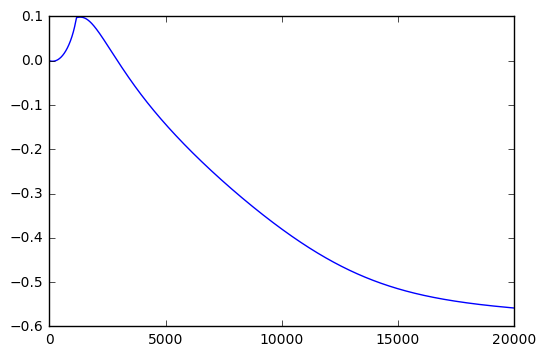

18


In [11]:
for i in range(20000):
    if i != 0:
        strain_new[i] = strain_new[i] + strain_new[i - 1]
plt.plot(strain_new)
plt.show()
print(len(s_dis))

###### print_dis()
plot_dis()

In [9]:
# #Contour plot
# number = 1000
# xlist = np.linspace(0, grid_size, number)
# ylist = np.linspace(0, grid_size, number)
# X, Y = np.meshgrid(xlist, ylist)
# Z = (0 * X )
# for i in range(number):
#     for j in range(number):
#         for k in range(len(s_dis)):
#             Z[i][j] = Z[i][j] + stress_field(x_dis[k], y_dis[k], X[i][j], Y[i][j])

# plt.figure()
# cp = plt.contourf(X, Y, Z)
# plt.colorbar(cp)
# #plt.clabel(cp, inline=True, fontsize=10)
# print(Z)
# plt.title('Contour Plot')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()